In [323]:
import requests
import numpy as np
import matplotlib.pyplot as plt

In [324]:
sections = requests.get("http://localhost:8000/data/get-dummysections").json()
for section in sections:
    print(section.get("name"))

test-0
test-0
test-1-1
test-1-1-1
test-1-2-1
test-1-2-2
400mm-n-1
400mm-n-2
400mm-n-3
400mm-n-b-1
400mm-n-b-2
400mm-n-b-3
600mm-n-1
600mm-n-2
600mm-n-3
600mm-n-b-1
600mm-n-b-2
600mm-n-b-3
800mm-n-1
800mm-n-2
800mm-n-3
800mm-n-b-1
800mm-n-b-2
800mm-n-b-3
1000mm-n-1
1000mm-n-2
1000mm-n-3
1000mm-n-b-1
1000mm-n-b-2
1000mm-n-b-3
1200mm-n-1
1200mm-n-2
1200mm-n-3
1200mm-n-b-1
1200mm-n-b-2
1200mm-n-b-3
1400mm-n-1
1400mm-n-2
1400mm-n-3
1400mm-n-b-1
1400mm-n-b-2
1400mm-n-b-3
1600mm-n-1
1600mm-n-2
1600mm-n-3
1600mm-n-b-1
test-00
test-new-1-1-1
test-new-1-1-2
test-floor-1
calpoints-r-1
calpoints-r-2
calpoints-r-3
calpoints-r-4
calpoints-r-5
calpoints-l-1
calpoints-l-2
calpoints-l-3
calpoints-l-4
calpoints-l-5
measpoints-r-1
measpoints-r-2
measpoints-r-3
measpoints-r-4
measpoints-r-5
measpoints-l-1
measpoints-l-2
measpoints-l-3
measpoints-l-4
measpoints-l-5
calpoints-c-r-1
calpoints-c-r-2
calpoints-c-r-3
calpoints-c-r-4
calpoints-c-r-5
calpoints-c-l-1
calpoints-c-l-2
calpoints-c-l-3
calpoints-c-l-4

In [325]:
for section in sections:
    if section.get("name").find("newconfig-pattern-1-") == 0:
        print(section.get("name"))

newconfig-pattern-1-1
newconfig-pattern-1-2
newconfig-pattern-1-3


In [326]:
# grid: 23
point_calc = []

for section in sections:
    if section.get("name").find("boat_big_1") ==0 :
        points = section.get("points")
        point_disp = []
        for point in points:
            h = point.get("h")
            v = point.get("v")
            l = point.get("l")
            point_disp.append([h,v,l])
        point_calc.append(point_disp)

point_arr = np.array(point_calc)
print(point_arr)


[[[ -3098  16049   1937]
  [  3337  16100   1937]
  [  9486  15749   2038]
  [ 15473  15009   2256]
  [ 21449  13821   2602]
  [ 23551  13248   2770]
  [ 25112  12883   2898]
  [ 26056  12773   2938]
  [ 26963  12670   2981]
  [ 27779  12745   2959]
  [ 28518  12878   2909]
  [ 29646  13080   2841]
  [ 32225  13633   2661]
  [ 35953  14434   2434]
  [ 39455  15084   2266]
  [ 42175  15527   2148]
  [ 48625  16323   1969]
  [ 54909  16557   1927]
  [ 60953  16525   1927]
  [ 66938  15971   2046]
  [ 71777  15268   2216]
  [ 76887  14254   2494]
  [ 79974  13484   2731]
  [ 83309  12617   3028]
  [ 85459  11989   3276]
  [ 87152  11513   3466]
  [ 88371  11316   3554]
  [ 89743  11139   3635]
  [ 91312  11158   3625]
  [ 93161  11367   3525]
  [ 95690  11716   3375]
  [100499  12313   3138]
  [104018  12600   3022]
  [108220  12859   2920]
  [112650  12910   2901]
  [117615  12788   2930]
  [122721  12424   3068]
  [125131  12246   3127]
  [128184  11807   3315]
  [129023  11727   3345]


In [327]:
#np.mean(point_arr[0]-point_arr[1], axis=0)

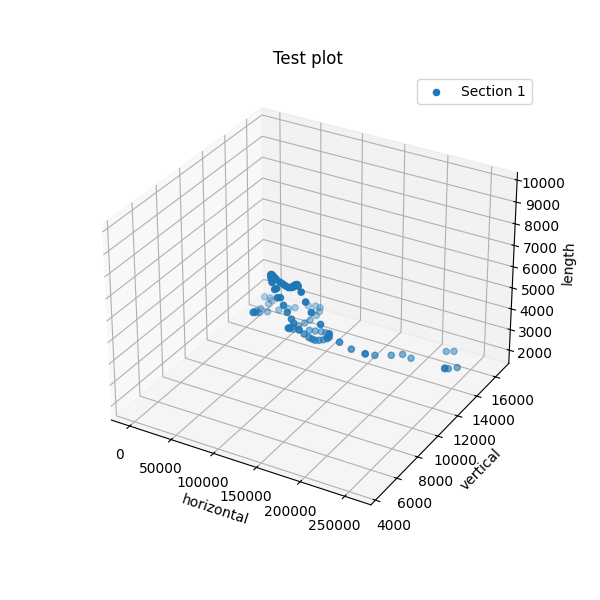

In [328]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')


for i, section in enumerate(point_calc):
    section = np.array(section)
    x, y, z = section[:, 0], section[:, 1], section[:, 2]
    ax.scatter(x, y, z, marker='o', label=f'Section {i+1}')

# Labels and title
ax.set_xlabel('horizontal')
ax.set_ylabel('vertical')
ax.set_zlabel('length')
ax.set_title('Test plot')

# Display legend
ax.legend()

# Show the plot
plt.show()

In [329]:
mean_points = np.mean(point_arr, axis=0)
std_points = np.std(point_arr, axis=0)

In [330]:
print(mean_points)

print()

print(std_points)


p_diff = std_points/mean_points

print(p_diff *100)

[[ -3098.  16049.   1937.]
 [  3337.  16100.   1937.]
 [  9486.  15749.   2038.]
 [ 15473.  15009.   2256.]
 [ 21449.  13821.   2602.]
 [ 23551.  13248.   2770.]
 [ 25112.  12883.   2898.]
 [ 26056.  12773.   2938.]
 [ 26963.  12670.   2981.]
 [ 27779.  12745.   2959.]
 [ 28518.  12878.   2909.]
 [ 29646.  13080.   2841.]
 [ 32225.  13633.   2661.]
 [ 35953.  14434.   2434.]
 [ 39455.  15084.   2266.]
 [ 42175.  15527.   2148.]
 [ 48625.  16323.   1969.]
 [ 54909.  16557.   1927.]
 [ 60953.  16525.   1927.]
 [ 66938.  15971.   2046.]
 [ 71777.  15268.   2216.]
 [ 76887.  14254.   2494.]
 [ 79974.  13484.   2731.]
 [ 83309.  12617.   3028.]
 [ 85459.  11989.   3276.]
 [ 87152.  11513.   3466.]
 [ 88371.  11316.   3554.]
 [ 89743.  11139.   3635.]
 [ 91312.  11158.   3625.]
 [ 93161.  11367.   3525.]
 [ 95690.  11716.   3375.]
 [100499.  12313.   3138.]
 [104018.  12600.   3022.]
 [108220.  12859.   2920.]
 [112650.  12910.   2901.]
 [117615.  12788.   2930.]
 [122721.  12424.   3068.]
 

In [331]:
differences = []

# Calculate the difference between each point in a section and the average
for section in point_arr:
    diff = section - mean_points  # Difference from the average
    differences.append(diff)

# Convert differences list to numpy array for easier manipulation if needed
differences_np = np.array(differences)

print("Differences from the average for each section:")
print(differences_np )

print("In percentage:")
print(differences_np / mean_points * 100)

Differences from the average for each section:
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0

# Plot XYZ conversion

In [332]:
HORIZONTAL_MAX = 228000
VERTICAL_MAX = 228000

LENGTH_OFFSET = 170 + 35 - 2 + 18 

V_SCALE = [
    1729, 2158, 2593, 3029, 3467, 
    3892, 4328, 4784, 5233, 5668, 
    6103, 6549, 7003, 7428, 7863, 
    8314, 8777, 9212, 9648, 10097, 
    10551, 10980, 11432, 11879, 12334, 
    12780, 13217, 13663, 14112, 14545, 
    14990, 15436, 15887, 16333, 16756, 
    17210, 17656, 18092, 18544, 18993, 
    19449, 19892, 20331, 20786, 21232,
    21668, 22113, 22559, 23012, 23448, 
    23878, 24329, 24776, 25220, 25666,
    26115, 26571
]
MM_CSALE = np.arange(200,3050,50)


def convert_to_xyz(h, v, l):
    # Normalize h and v to radians between 0 and 2π using numpy
    h_angle = (h % HORIZONTAL_MAX) * (2 * np.pi / HORIZONTAL_MAX)
    v_angle = (v % VERTICAL_MAX) * (2 * np.pi / VERTICAL_MAX)

    v_angle += np.pi/2
    # Compute the radial distance r
    #r = (l - LENGTH_V_OFFSET)*(LENGTH_MAX_VALUE_MM/ (LENGTH_MAX-LENGTH_V_OFFSET)) + LENGTH_OFFSET
    #r = p(l)
    #r = (l-VOLTAGE_ZERO)*((3000-17)/VOLTAGE_3000)+LENGTH_OFFSET
    r = np.interp([l],V_SCALE, MM_CSALE) + LENGTH_OFFSET
    # Convert spherical to Cartesian coordinates
    x = r * np.sin(v_angle) * np.cos(h_angle)
    y = r * np.sin(v_angle) * np.sin(h_angle)
    z = r * np.cos(v_angle)
    

    return x, y, z

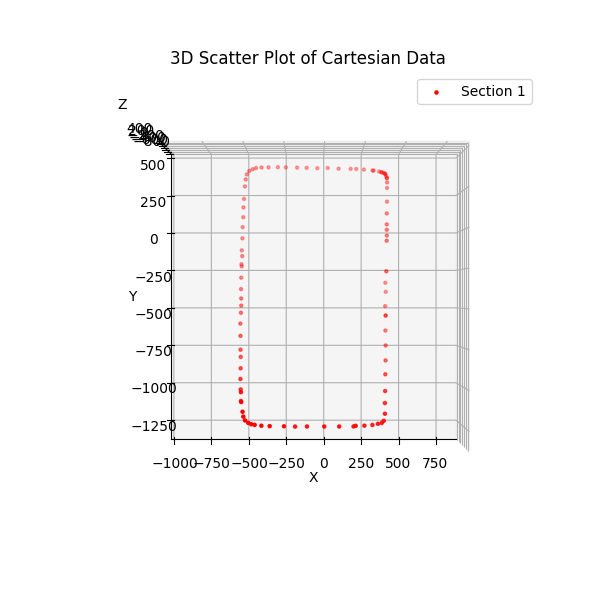

Average Points:
[[[ 4.00935609e+02]
  [-3.43129468e+01]
  [-1.90562524e+02]]

 [[ 4.00433828e+02]
  [ 3.69282430e+01]
  [-1.91127890e+02]]

 [[ 4.00555841e+02]
  [ 1.07162997e+02]
  [-1.92179328e+02]]

 [[ 4.02056047e+02]
  [ 1.82643517e+02]
  [-1.93832921e+02]]

 [[ 4.02399236e+02]
  [ 2.70063168e+02]
  [-1.94057374e+02]]

 [[ 4.02819521e+02]
  [ 3.05599219e+02]
  [-1.93259551e+02]]

 [[ 4.01378927e+02]
  [ 3.32646158e+02]
  [-1.93266621e+02]]

 [[ 3.96272581e+02]
  [ 3.46190922e+02]
  [-1.93266997e+02]]

 [[ 3.91311384e+02]
  [ 3.59491074e+02]
  [-1.93459635e+02]]

 [[ 3.81132045e+02]
  [ 3.66279622e+02]
  [-1.93689474e+02]]

 [[ 3.69289949e+02]
  [ 3.69656496e+02]
  [-1.93633133e+02]]

 [[ 3.51884981e+02]
  [ 3.74843630e+02]
  [-1.93788364e+02]]

 [[ 3.10362126e+02]
  [ 3.81649740e+02]
  [-1.94026613e+02]]

 [[ 2.53999172e+02]
  [ 3.87677128e+02]
  [-1.94736808e+02]]

 [[ 2.05592873e+02]
  [ 3.91553021e+02]
  [-1.95209369e+02]]

 [[ 1.69825127e+02]
  [ 3.92294403e+02]
  [-1.94958930

In [333]:
%matplotlib widget

from mpl_toolkits.mplot3d import Axes3D



data_cartesian = []
for section in point_calc:
    section_cartesian = [convert_to_xyz(h, v, l) for h, v, l in section]
    #section_cartesian = [convert_to_xyz(h, 0, l) for h, v, l in section]
    data_cartesian.append(section_cartesian)

data_np  = np.array(data_cartesian)

# Calculate the average and standard deviation
mean_points = np.mean(data_np, axis=0)
std_points = np.std(data_np, axis=0)

# Calculate the difference between each section and the average
differences = []
for section in data_np:
    diff = section - mean_points  # Difference from the average
    differences.append(diff)

# Convert differences list to numpy array
differences_np = np.array(differences)

# Plot the Cartesian coordinates for each section
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

# Plot each section as a scatter plot
colors = ['r', 'g', 'b']
for i, section in enumerate(data_np):
    x, y, z = section[:, 0], section[:, 1], section[:, 2]
    ax.scatter(x, y, z, color=colors[i % len(colors)], label=f'Section {i+1}', s=5)

# Plot average points
#ax.scatter(mean_points[:, 0], mean_points[:, 1], mean_points[:, 2], color='k', label='Mean Points', s=5, marker='x')

# Labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Scatter Plot of Cartesian Data')
ax.axis("equal")

ax.view_init(elev=90, azim=-90, roll=0)

# Show legend
ax.legend()

# Show the plot
plt.show()

# Print results
print("Average Points:")
print(mean_points)

print("\nStandard Deviation of Points:")
print(std_points)

print("\nDifferences from the average for each section:")
print(differences_np)

In [334]:
print(np.max(differences_np))

0.0


(np.float64(-582.6084056010134),
 np.float64(449.7446605419059),
 np.float64(-1337.8269397636707),
 np.float64(486.1544435995735))

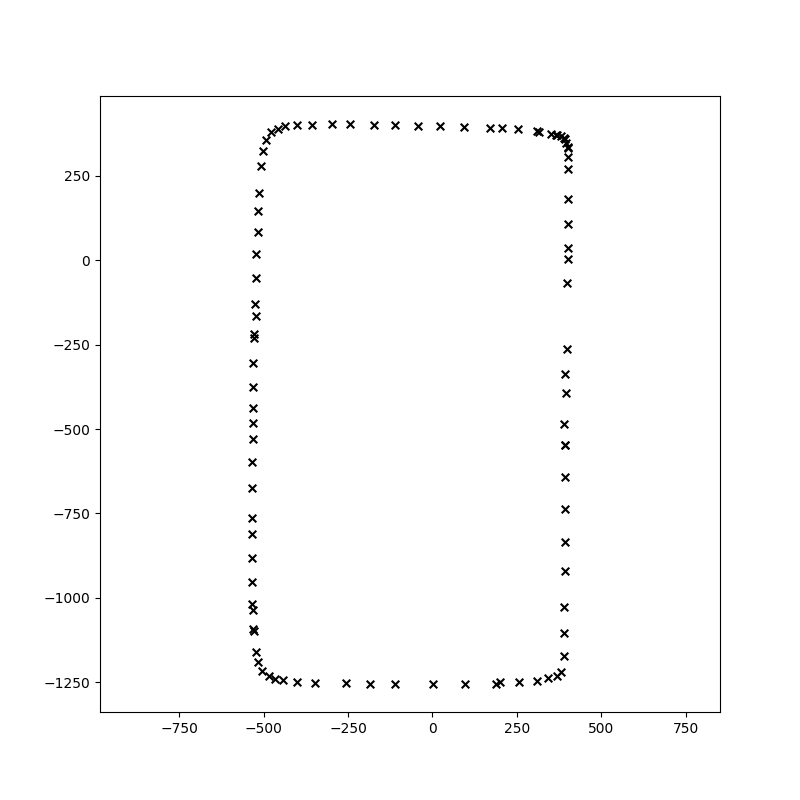

In [335]:
plt.figure(figsize=(8,8))
plt.scatter(mean_points[1:,0], mean_points[1:,1], color='k', label='Mean Points', s=30, marker='x')
plt.axis("equal")

In [336]:
def calc_dist(point1, point2):
    return np.linalg.norm(point1-point2)

In [337]:
calc_dist(mean_points[0],mean_points[-1])
calc_dist(mean_points[0],mean_points[43])

np.float64(1033.2781398197849)

In [338]:
for i in range (len(mean_points)-1):
    print(f"{i} - {i+1} : {calc_dist(mean_points[i], mean_points[i+1]):.2f}")

0 - 1 : 71.25
1 - 2 : 70.24
2 - 3 : 75.51
3 - 4 : 87.42
4 - 5 : 35.55
5 - 6 : 27.09
6 - 7 : 14.48
7 - 8 : 14.20
8 - 9 : 12.24
9 - 10 : 12.31
10 - 11 : 18.16
11 - 12 : 42.08
12 - 13 : 56.69
13 - 14 : 48.56
14 - 15 : 35.78
15 - 16 : 77.35
16 - 17 : 69.67
17 - 18 : 66.34
18 - 19 : 68.73
19 - 20 : 60.65
20 - 21 : 72.63
21 - 22 : 50.66
22 - 23 : 60.01
23 - 24 : 44.40
24 - 25 : 35.53
25 - 26 : 22.77
26 - 27 : 25.00
27 - 28 : 26.41
28 - 29 : 33.12
29 - 30 : 44.88
30 - 31 : 80.09
31 - 32 : 54.48
32 - 33 : 62.57
33 - 34 : 63.81
34 - 35 : 71.66
35 - 36 : 76.88
36 - 37 : 36.96
37 - 38 : 52.30
38 - 39 : 13.77
39 - 40 : 72.27
40 - 41 : 73.16
41 - 42 : 59.87
42 - 43 : 45.67
43 - 44 : 45.74
44 - 45 : 69.27
45 - 46 : 78.34
46 - 47 : 88.65
47 - 48 : 45.84
48 - 49 : 73.11
49 - 50 : 68.38
50 - 51 : 66.66
51 - 52 : 73.72
52 - 53 : 56.76
53 - 54 : 63.61
54 - 55 : 61.96
55 - 56 : 31.49
56 - 57 : 26.99
57 - 58 : 25.69
58 - 59 : 21.23
59 - 60 : 21.73
60 - 61 : 43.29
61 - 62 : 53.11
62 - 63 : 91.01
63 - 64 : 7

In [339]:
for sec in data_np:
    for i in range (len(sec)-1):
        if i == 7:
            continue
        print(f"{i+1} - {i+2} : {calc_dist(sec[i], sec[i+1]):.2f}")
    print("-------------------")

1 - 2 : 71.25
2 - 3 : 70.24
3 - 4 : 75.51
4 - 5 : 87.42
5 - 6 : 35.55
6 - 7 : 27.09
7 - 8 : 14.48
9 - 10 : 12.24
10 - 11 : 12.31
11 - 12 : 18.16
12 - 13 : 42.08
13 - 14 : 56.69
14 - 15 : 48.56
15 - 16 : 35.78
16 - 17 : 77.35
17 - 18 : 69.67
18 - 19 : 66.34
19 - 20 : 68.73
20 - 21 : 60.65
21 - 22 : 72.63
22 - 23 : 50.66
23 - 24 : 60.01
24 - 25 : 44.40
25 - 26 : 35.53
26 - 27 : 22.77
27 - 28 : 25.00
28 - 29 : 26.41
29 - 30 : 33.12
30 - 31 : 44.88
31 - 32 : 80.09
32 - 33 : 54.48
33 - 34 : 62.57
34 - 35 : 63.81
35 - 36 : 71.66
36 - 37 : 76.88
37 - 38 : 36.96
38 - 39 : 52.30
39 - 40 : 13.77
40 - 41 : 72.27
41 - 42 : 73.16
42 - 43 : 59.87
43 - 44 : 45.67
44 - 45 : 45.74
45 - 46 : 69.27
46 - 47 : 78.34
47 - 48 : 88.65
48 - 49 : 45.84
49 - 50 : 73.11
50 - 51 : 68.38
51 - 52 : 66.66
52 - 53 : 73.72
53 - 54 : 56.76
54 - 55 : 63.61
55 - 56 : 61.96
56 - 57 : 31.49
57 - 58 : 26.99
58 - 59 : 25.69
59 - 60 : 21.23
60 - 61 : 21.73
61 - 62 : 43.29
62 - 63 : 53.11
63 - 64 : 91.01
64 - 65 : 71.44
65 - 66

In [340]:
for sec in data_np:
    for i in range (len(sec)-6):
        if i == 0:
            continue
        print(f"{i+1} - {i+6} : {calc_dist(sec[i], sec[i+6]):.2f}")
    print("-------------------")

2 - 7 : 309.30
3 - 8 : 252.50
4 - 9 : 184.82
5 - 10 : 104.95
6 - 11 : 85.96
7 - 12 : 103.37
8 - 13 : 148.21
9 - 14 : 188.47
10 - 15 : 212.91
11 - 16 : 277.84
12 - 17 : 329.74
13 - 18 : 354.03
14 - 19 : 366.22
15 - 20 : 378.38
16 - 21 : 415.23
17 - 22 : 388.55
18 - 23 : 378.91
19 - 24 : 357.00
20 - 25 : 323.62
21 - 26 : 284.58
22 - 27 : 235.21
23 - 28 : 203.71
24 - 29 : 164.78
25 - 30 : 161.43
26 - 31 : 212.11
27 - 32 : 251.29
28 - 33 : 297.90
29 - 34 : 338.45
30 - 35 : 377.29
31 - 36 : 409.39
32 - 37 : 366.06
33 - 38 : 363.79
34 - 39 : 314.80
35 - 40 : 323.29
36 - 41 : 324.79
37 - 42 : 307.78
38 - 43 : 316.62
39 - 44 : 310.24
40 - 45 : 365.85
41 - 46 : 371.92
42 - 47 : 387.40
43 - 48 : 373.35
44 - 49 : 400.79
45 - 50 : 423.45
46 - 51 : 420.91
47 - 52 : 416.27
48 - 53 : 271.12
49 - 54 : 288.92
50 - 55 : 277.49
51 - 56 : 240.69
52 - 57 : 199.87
53 - 58 : 147.39
54 - 59 : 215.23
55 - 60 : 168.66
56 - 61 : 149.83
57 - 62 : 179.05
58 - 63 : 250.96
59 - 64 : 300.04
60 - 65 : 355.80
61 - 66 :

In [341]:
for sec in point_calc:
    for i in range(len(sec) -1):
        if i == 0:
            continue
        print(np.array(sec[i]) -np.array(sec[i+1]))
    print("---------------")

[-6149   351  -101]
[-5987   740  -218]
[-5976  1188  -346]
[-2102   573  -168]
[-1561   365  -128]
[-944  110  -40]
[-907  103  -43]
[-816  -75   22]
[-739 -133   50]
[-1128  -202    68]
[-2579  -553   180]
[-3728  -801   227]
[-3502  -650   168]
[-2720  -443   118]
[-6450  -796   179]
[-6284  -234    42]
[-6044    32     0]
[-5985   554  -119]
[-4839   703  -170]
[-5110  1014  -278]
[-3087   770  -237]
[-3335   867  -297]
[-2150   628  -248]
[-1693   476  -190]
[-1219   197   -88]
[-1372   177   -81]
[-1569   -19    10]
[-1849  -209   100]
[-2529  -349   150]
[-4809  -597   237]
[-3519  -287   116]
[-4202  -259   102]
[-4430   -51    19]
[-4965   122   -29]
[-5106   364  -138]
[-2410   178   -59]
[-3053   439  -188]
[-839   80  -30]
[-3853   670  -289]
[-3514   692  -327]
[-2606   583  -296]
[-1796   403  -257]
[-1575   432  -288]
[-2104   605  -457]
[-2231   634  -500]
[-2151   635  -608]
[-1023   289  -327]
[-1395   475  -536]
[-1138   412  -504]
[-1082   353  -506]
[-1066   397  -

In [342]:
for j in point_calc:
    print(j)

[[-3098, 16049, 1937], [3337, 16100, 1937], [9486, 15749, 2038], [15473, 15009, 2256], [21449, 13821, 2602], [23551, 13248, 2770], [25112, 12883, 2898], [26056, 12773, 2938], [26963, 12670, 2981], [27779, 12745, 2959], [28518, 12878, 2909], [29646, 13080, 2841], [32225, 13633, 2661], [35953, 14434, 2434], [39455, 15084, 2266], [42175, 15527, 2148], [48625, 16323, 1969], [54909, 16557, 1927], [60953, 16525, 1927], [66938, 15971, 2046], [71777, 15268, 2216], [76887, 14254, 2494], [79974, 13484, 2731], [83309, 12617, 3028], [85459, 11989, 3276], [87152, 11513, 3466], [88371, 11316, 3554], [89743, 11139, 3635], [91312, 11158, 3625], [93161, 11367, 3525], [95690, 11716, 3375], [100499, 12313, 3138], [104018, 12600, 3022], [108220, 12859, 2920], [112650, 12910, 2901], [117615, 12788, 2930], [122721, 12424, 3068], [125131, 12246, 3127], [128184, 11807, 3315], [129023, 11727, 3345], [132876, 11057, 3634], [136390, 10365, 3961], [138996, 9782, 4257], [140792, 9379, 4514], [142367, 8947, 4802], 

In [343]:
for sec in data_np:
    print(sec)
    print(np.diff(sec[:,0]))
    print(np.diff(sec[:,1]))
    print(np.diff(sec[:,2]))
    print("----")

[[[ 4.00935609e+02]
  [-3.43129468e+01]
  [-1.90562524e+02]]

 [[ 4.00433828e+02]
  [ 3.69282430e+01]
  [-1.91127890e+02]]

 [[ 4.00555841e+02]
  [ 1.07162997e+02]
  [-1.92179328e+02]]

 [[ 4.02056047e+02]
  [ 1.82643517e+02]
  [-1.93832921e+02]]

 [[ 4.02399236e+02]
  [ 2.70063168e+02]
  [-1.94057374e+02]]

 [[ 4.02819521e+02]
  [ 3.05599219e+02]
  [-1.93259551e+02]]

 [[ 4.01378927e+02]
  [ 3.32646158e+02]
  [-1.93266621e+02]]

 [[ 3.96272581e+02]
  [ 3.46190922e+02]
  [-1.93266997e+02]]

 [[ 3.91311384e+02]
  [ 3.59491074e+02]
  [-1.93459635e+02]]

 [[ 3.81132045e+02]
  [ 3.66279622e+02]
  [-1.93689474e+02]]

 [[ 3.69289949e+02]
  [ 3.69656496e+02]
  [-1.93633133e+02]]

 [[ 3.51884981e+02]
  [ 3.74843630e+02]
  [-1.93788364e+02]]

 [[ 3.10362126e+02]
  [ 3.81649740e+02]
  [-1.94026613e+02]]

 [[ 2.53999172e+02]
  [ 3.87677128e+02]
  [-1.94736808e+02]]

 [[ 2.05592873e+02]
  [ 3.91553021e+02]
  [-1.95209369e+02]]

 [[ 1.69825127e+02]
  [ 3.92294403e+02]
  [-1.94958930e+02]]

 [[ 9.24

In [344]:
d = 4
for i in range (len(mean_points)-d):
    if i == 0:
        continue
    print(f"{i+1} - {i+d} : {calc_dist(mean_points[i], mean_points[i+d]):.2f}")

2 - 5 : 268.69
3 - 6 : 225.49
4 - 7 : 163.65
5 - 8 : 90.11
6 - 9 : 64.44
7 - 10 : 48.99
8 - 11 : 52.83
9 - 12 : 83.93
10 - 13 : 128.93
11 - 14 : 165.16
12 - 15 : 182.90
13 - 16 : 218.21
14 - 17 : 231.27
15 - 18 : 249.00
16 - 19 : 281.95
17 - 20 : 265.26
18 - 21 : 268.29
19 - 22 : 252.67
20 - 23 : 243.89
21 - 24 : 227.65
22 - 25 : 190.42
23 - 26 : 161.69
24 - 27 : 125.58
25 - 28 : 103.93
26 - 29 : 98.46
27 - 30 : 120.74
28 - 31 : 181.62
29 - 32 : 212.26
30 - 33 : 241.89
31 - 34 : 260.89
32 - 35 : 252.45
33 - 36 : 274.86
34 - 37 : 249.05
35 - 38 : 237.45
36 - 39 : 179.38
37 - 40 : 174.78
38 - 41 : 211.17
39 - 42 : 218.86
40 - 43 : 250.90
41 - 44 : 224.40
42 - 45 : 220.45
43 - 46 : 238.91
44 - 47 : 281.89
45 - 48 : 281.97
46 - 49 : 285.91
47 - 50 : 275.94
48 - 51 : 253.92
49 - 52 : 281.80
50 - 53 : 152.28
51 - 54 : 147.60
52 - 55 : 142.83
53 - 56 : 100.89
54 - 57 : 182.51
55 - 58 : 139.96
56 - 59 : 97.52
57 - 60 : 89.60
58 - 61 : 109.45
59 - 62 : 138.26
60 - 63 : 208.75
61 - 64 : 258.63
6

In [345]:
# rotate coordinate system 
def rotate_to_xy_plane(points, p1, p2, p3):
    # Calculate vectors from the three points
    v1 = p2 - p1
    v2 = p3 - p1

    # Calculate the normal vector to the plane (cross product of v1 and v2)
    normal_vector = np.cross(v1, v2)
    normal_vector /= np.linalg.norm(normal_vector)  # Normalize the normal vector

    # Z-axis is the target direction
    z_axis = np.array([0, 0, 1])

    # Calculate the rotation axis (cross product between normal and z-axis)
    rotation_axis = np.cross(normal_vector, z_axis)
    axis_length = np.linalg.norm(rotation_axis)

    # If the normal vector is already aligned with z-axis, no rotation is needed
    if axis_length != 0:
        rotation_axis /= axis_length  # Normalize the rotation axis

        # Calculate the angle of rotation using dot product
        cos_theta = np.dot(normal_vector, z_axis)
        angle = np.arccos(cos_theta)  # Angle between normal and z-axis

        # Compute the skew-symmetric cross-product matrix for the rotation axis
        K = np.array([
            [0, -rotation_axis[2], rotation_axis[1]],
            [rotation_axis[2], 0, -rotation_axis[0]],
            [-rotation_axis[1], rotation_axis[0], 0]
        ])

        # Use Rodrigues' rotation formula to compute the rotation matrix
        R = np.eye(3) + np.sin(angle) * K + (1 - np.cos(angle)) * np.dot(K, K)

        # Apply the rotation matrix to all points
        rotated_points = np.dot(points, R.T)  # Rotate all points
    else:
        # If already aligned, no rotation is required
        rotated_points = points

    return rotated_points

## Fit plane

In [346]:
mean_points.shape

(94, 3, 1)

In [347]:
tmp = mean_points[:,2]

In [348]:
b = mean_points[:,2]
A = np.hstack((mean_points[:,:2,0],np.ones((mean_points.shape[0],1))))


In [349]:
from scipy.linalg import lstsq
fit, residual, rnk, s = lstsq(A, b)

In [350]:
norm = np.hstack((fit[0], fit[1], np.array([-1])))
p = np.hstack((np.zeros((2)),fit[2]))
norm, p

(array([-0.00153817, -0.01487973, -1.        ]),
 array([   0.      ,    0.      , -190.987461]))

In [351]:
def calc_dist_from_plane(points: np.array, plane: np.array):
    """
        points: np.array shape: (any, 3)
        plane given as: plane[0]*x + plane[1]*y + plane[2] = z
    """
    assert points.shape[1] == 3, "Input points must have shape (N, 3)."
    #norm = np.hstack((plane[0], plane[1], np.array([-1])))
    #p   = np.hstack((np.zeros((2)),plane[2]))

    return (plane[0]*points[:,0] + plane[1]*points[:,1] - points[:,2] + plane[2]) / np.sqrt(plane[0]**2 + plane[1]**2 +1)

In [352]:
def project_points_to_plane(points: np.array, plane:np.array):
    """ 
        points: np.array shape: (any, 3)
        plane given as: plane[0]*x + plane[1]*y + plane[2] = z
    """
    assert points.shape[1] == 3, "Input points must have shape (N, 3)."
    norm = np.hstack((plane[0], plane[1], np.array([-1])))
    normal_norm = np.linalg.norm(norm)

    distances = calc_dist_from_plane(points, plane) 

    normal_unit = norm / normal_norm
    
    projections = points - np.outer(distances, normal_unit)
    
    return projections, distances

In [353]:
projected_points, distances = project_points_to_plane(data_np[0][:,:,0], fit)

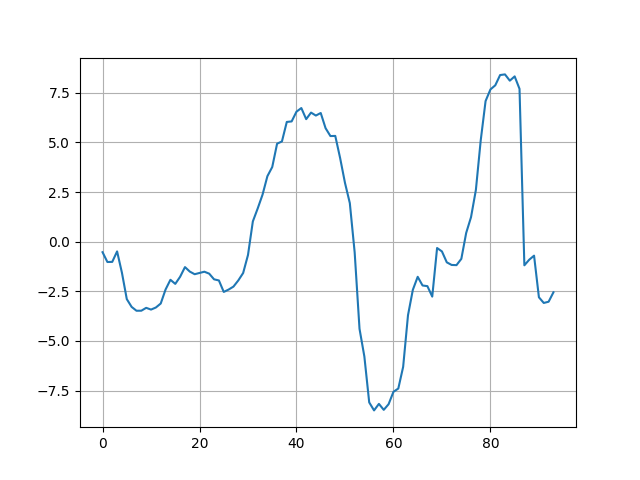

In [362]:
plt.figure()
plt.plot(np.arange(0,len(distances), 1),distances)
plt.grid()
plt.show()

/tmp/ipykernel_17512/4231223471.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z[r,c] = fit[0] * X[r,c] + fit[1] * Y[r,c] + fit[2]


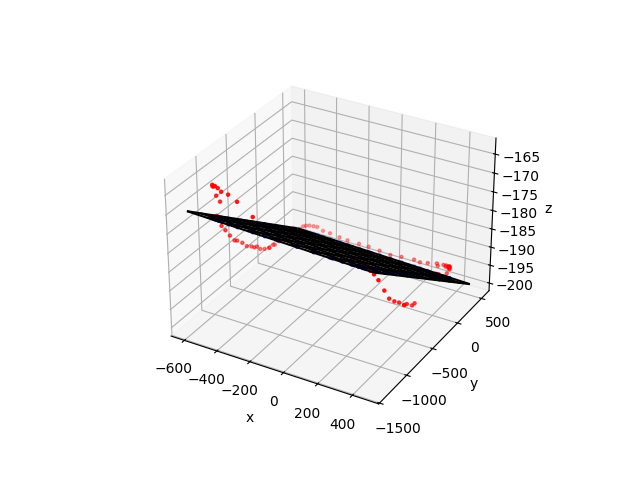

In [355]:
# plot plane
plt.figure()
ax = plt.subplot(111, projection='3d')
for i, section in enumerate(data_np):
    x, y, z = section[:, 0], section[:, 1], section[:, 2]
    ax.scatter(x, y, z, color=colors[i % len(colors)], label=f'Section {i+1}', s=5)

x,y,z = projected_points[:,0], projected_points[:,1], projected_points[:,2]
ax.scatter(x, y, z, color="b", label=f'Section {i+1}', s=10)

xlim = ax.get_xlim()
ylim = ax.get_ylim()
X,Y = np.meshgrid(np.linspace(xlim[0], xlim[1], 10),
                  np.linspace(ylim[0], ylim[1], 10))
Z = np.zeros(X.shape)
for r in range(X.shape[0]):
    for c in range(X.shape[1]):
        Z[r,c] = fit[0] * X[r,c] + fit[1] * Y[r,c] + fit[2]
ax.plot_wireframe(X,Y,Z, color='k')
colors = ['r', 'g', 'b']
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

## Rotate coordinate system

In [356]:
import numpy as np

def rotation_matrix(v1: np.ndarray, v2: np.ndarray) -> np.ndarray:
    """
    Calculate the rotation matrix that rotates vector v1 to vector v2.

    Args:
        v1 (np.ndarray): Source vector of shape (3,).
        v2 (np.ndarray): Target vector of shape (3,).

    Returns:
        np.ndarray: Rotation matrix (3x3).
    """
    # Normalize the input vectors
    v1 = v1 / np.linalg.norm(v1)
    v2 = v2 / np.linalg.norm(v2)
    
    # Cross product to find the rotation axis
    axis = np.cross(v1, v2)
    axis_norm = np.linalg.norm(axis)
    
    # If the vectors are already aligned
    if axis_norm == 0:
        return np.eye(3)
    
    # Normalize the rotation axis
    axis /= axis_norm
    
    # Compute the angle between v1 and v2
    angle = np.arccos(np.clip(np.dot(v1, v2), -1.0, 1.0))
    
    # Rodrigues' rotation formula components
    K = np.array([
        [0, -axis[2], axis[1]],
        [axis[2], 0, -axis[0]],
        [-axis[1], axis[0], 0]
    ])
    
    # Rotation matrix
    R = np.eye(3) + np.sin(angle) * K + (1 - np.cos(angle)) * np.dot(K, K)
    
    return R


In [357]:
# Define the vectors
v1 = np.array([2, 3, 4])
v2 = np.array([0, 0, 1])

# Get the rotation matrix
R = rotation_matrix(v1, v2)

# Verify the result
rotated_v1 = R @ v1
print("Rotation Matrix:\n", R)
print("Rotated Vector:\n", rotated_v1)


Rotation Matrix:
 [[ 0.9208558  -0.1187163  -0.37139068]
 [-0.1187163   0.82192555 -0.55708601]
 [ 0.37139068  0.55708601  0.74278135]]
Rotated Vector:
 [0.         0.         5.38516481]


In [358]:
norm = np.hstack((fit[0], fit[1], np.array([-1])))
v2 = np.array([0,0,1])
R = rotation_matrix(norm,v2)
R

array([[ 0.9788551 , -0.20454907,  0.00153799],
       [-0.20454907, -0.97874324,  0.01487806],
       [-0.00153799, -0.01487806, -0.99988813]])

In [359]:
rotated_points = projected_points @ R.T

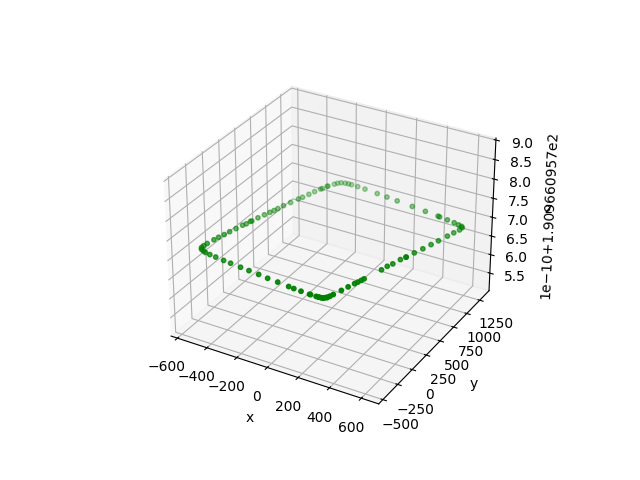

In [360]:
# plot plane
plt.figure()
ax = plt.subplot(111, projection='3d')
x,y,z = rotated_points[:,0], rotated_points[:,1], rotated_points[:,2]
ax.scatter(x, y, z, color="green", label=f'Section {i+1}', s=10)


ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

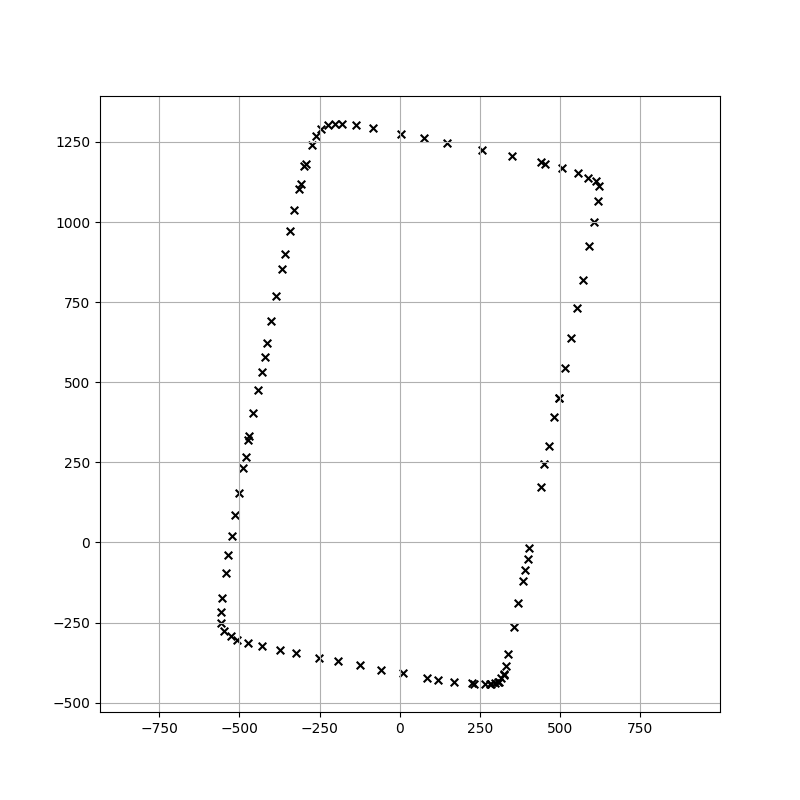

In [361]:
plt.figure(figsize=(8,8))
plt.scatter(rotated_points[:,0], rotated_points[:,1], color='k', label='Mean Points', s=30, marker='x')
plt.axis("equal")
plt.grid()

## DXF

In [386]:
import ezdxf 
from ezdxf import units

def export_points_to_dxf(points: np.ndarray, filename: str):
    """
    Exports 3D points to a DXF file using the ezdxf library.

    Args:
        points (np.ndarray): A NumPy array of shape (n, 3) containing 3D points.
        filename (str): The output DXF file name.

    """
    assert points.shape[1] == 3, "Points array must have shape (n, 3)"
    
    # Create a new DXF document
    doc = ezdxf.new("R2010", setup=True)
    doc.units = units.MM
    msp = doc.modelspace()
    #sp.add_line((0, 0), (10, 0), dxfattribs={"linetype": "DASHED"})

    # Add each point to the modelspace
    #for point in points:
    #    msp.add_point(point[:2])

    msp.add_point([3,3])

    # Save the DXF file
    doc.saveas(filename)
    print(f"DXF file saved as {filename}")



In [387]:
#export_points_to_dxf(rotated_points/1000, "./test_dxf/res.dxf")

DXF file saved as ./test_dxf/res.dxf
